In [33]:
import numpy as np
import matplotlib.pyplot as plt
import random

MAX_NUM_ITERATION = 1000000

# load data from given binary files (change path accordingly if necessary)
data = np.array(np.load("PLA_data/data_small.npy"))
labels = np.array(np.load("PLA_data/label_small.npy"))

augmented_data = np.hstack((data, labels.reshape(-1, 1)))   # augmented data is simply an augmented matrix with features and labels

# remove lines related to seeds if you want to randomize the shuffling
seed = 17862
np.random.seed(seed)
np.random.shuffle(augmented_data)
split_ratio = 0.8                                      # split ration determines the ratio to split for training set
split_index = int(len(augmented_data) * split_ratio)    # split index is the index points to the splitting point

train_data = augmented_data[:split_index, :-1]  # take fetures only
train_labels = augmented_data[:split_index, -1] # take labels only

test_data = augmented_data[split_index:, :-1]
test_labels = augmented_data[split_index:, -1]

In [34]:
# definition of our classifier

class Perceptron():

    def __init__(self, data, labels):
        self.weights = np.random.rand(data.shape[1])
        self.misclassification_array = [True] * data.shape[0]
        self.data = data
        self.labels = labels

    # predict() - assign labels to data points according to current weights and update misclassification array if sample is misclassified
    def predict(self):
        for i in range(len(self.data)):
            prediction = self.weights @ self.data[i] # @ for vector multiplication (ref : numpy doc)
            if (prediction < 0 and self.labels[i] == 1) or (prediction > 0 and self.labels[i] == -1): # if misclassified -> update ms array
                self.misclassification_array[i] = True
            else:
                self.misclassification_array[i] = False         # truly classified

    # fit() - update weights according to PLA algorithm (select random misclassified sample and so on)
    def fit(self):
        (n_sample, n_feature) = self.data.shape
        i = 0
        while True:     # while i < MAX_NUM_ITERATION -> can be modified if we want to avoid infinite loop with linearly unseperable data
            i += 1

            self.predict()

            misclassified_indices = [index for index, value in enumerate(self.misclassification_array) if value == True]

            # print(f"Iteration : {i}\nnum of misclassification : {len(misclassified_indices)}")

            if len(misclassified_indices) == 0:                                                                 # stop if there is no misclassified sample
                # print("Seed",seed)
                print(f"Learned weights : w0={self.weights[0]} w1={self.weights[1]} w2={self.weights[2]}")
                self.draw(iteration = i)
                return self.weights

            misclassified_sample = random.choice(misclassified_indices)                                         # index of misclassified sample
            self.weights = self.weights + self.labels[misclassified_sample] * self.data[misclassified_sample]   # update weights

    # draw() - helper function that visualizes the linear seperation line (decision boundary) and sample points in the end
    def draw(self,iteration):
        plt.scatter(self.data[self.labels == 1, 1], self.data[self.labels == 1, 2], marker='o', label='Class 1', color='blue')
        plt.scatter(self.data[self.labels == -1, 1], self.data[self.labels == -1, 2], marker='x', label='Class -1', color='red')

        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        #plt.legend()

        #plt.xlim(-0.25, 1.25)
        #plt.ylim(-0.25, 1.25)

        #x_values = np.linspace(np.min(data[:, 1]), np.max(data[:, 1]), 100)
        #plt.plot(x_values, self.decision_boundary(x_values), label='Decision Boundary', color='black')
        a,b,c = self.weights[0], self.weights[1], self.weights[2]
        x_line = np.linspace(np.min(self.data[:, 1]), np.max(self.data[:, 1]), 100)
        y_line = (-a/c) + (-b/c) * x_line
        plt.plot(x_line, y_line, label=f'{c}y = {b}x + {a}', color='black')
        plt.title(f"Decision boundary and data points for iteration : {iteration}")
        # Show the plot
        plt.show()

In [35]:
def evaluate_model(test_data, test_labels, learned_weights):
    misclassification_count = 0
    size = len(test_data)
    for sample in range(size):
        prediction = learned_weights @ test_data[sample]
        if (prediction < 0 and test_labels[sample] == 1) or (prediction > 0 and test_labels[sample] == -1):
            misclassification_count += 1

    print(f"Model accuracy in test data : {1 - (misclassification_count / size)}")
    print(f"Number of misclassified sample : {misclassification_count}")
    print(f"Total number of samples in test data : {size}")

    return

Seed 17862
Learned weights : w0=-1.0550173301694277 w1=2.857047545877416 w2=0.18527041164321334


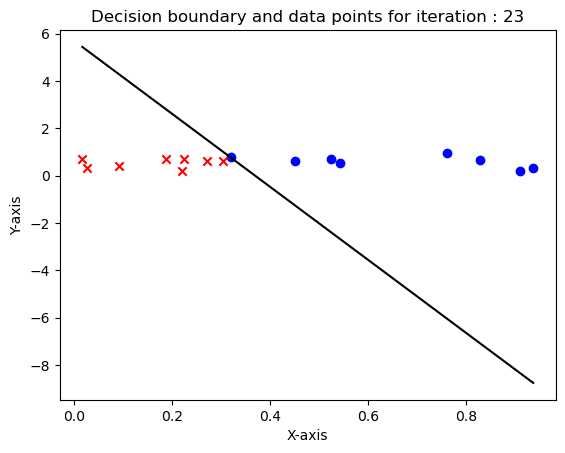

In [36]:
# main is defined seperately to increase readability
def main():
    perceptron = Perceptron(train_data, train_labels)
    learned_weights = perceptron.fit()
    # evaluate_model(test_data, test_labels, learned_weights)

if __name__ == "__main__":
    main()